# 문제 1. CNN 구현

다음은 CIFAR10 데이터셋을 사용하여 Image Classification Task를 수행하는 CNN을 구현하는 코드이다. 미완성된 부분을 주어진 설명 및 힌트에 따라 코드로 완성하시오. 특히, 모델 구현부분은 validation에 사용하는 test dataset의 정확도가 최대한 높은 모델을 만드는게 목적입니다. 답은 설명과 힌트만 주어진 경우 Code Cell을 추가하여 구현하고, 설명과 미완성 Code Cell이 주어진 경우 주어진 미완성 Code Cell에 직접 구현하시기 바랍니다. (40점)

In [ ]:
# For Local
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

### Load CIFAR10

In [ ]:
import numpy as np
from keras.datasets import cifar10 # cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # load dataset
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] # index

In [ ]:
import matplotlib.pyplot as plt

for i in range(9): # 이미지 확인
  plt.imshow(x_train[i])
  plt.show()

### Rescaling

x_train, x_test는 [0, 255]의 RGB값을 가지고 있어 [0, 1]로 Rescaling이 필요합니다

> np.max()를 통하여 최댓값을 구할 수 있습니다

### One-Hot Encoding

y_train, y_test의 값에 따라 one-hot encoding을 진행하여야 합니다

> tensorflow.one-hot, keras.utils.to_categorical을 통해 one-hot encoding을 진행할 수 있습니다

> one-hot encoding을 진행한 경우, predict 한 값은 decoding 해주어야 합니다

### Build Model

model의 input_shape를 정의해주어야 합니다

model을 구현하여야 합니다

In [ ]:
from keras.layers import *
from keras.models import Model

def build_model():
  # x = Input(shape=))
  out = x


  
  model = Model(x, out, name='')
  return model


In [ ]:
model = build_model()
model.summary()

### Train Model

model을 compile 한 후, fit function을 통하여 학습시킵니다

In [ ]:
# model.compile(loss = '', optimizer=, metrics =['accuracy'])
# history = model.fit(x_train, y_train, batch_size=, epochs=, validation_data=(x_test,y_test))

### Validation model

loss와 accuracy를 그래프로 출력합니다

test dataset을 이용하여 그래프를 출력합니다

model의 output이 one-hot이므로, 예측한 값도 decoding 해주어야 합니다

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']

plt.plot(losses, label='loss')
plt.plot(accs, label='acc')
plt.legend()
plt.show()

In [ ]:
# test data에 대한 pred값을 가져온다

In [ ]:
# 다르게 예측한 값을 출력한다

for x, y, p in zip(x_test, y_test, preds):
  y = np.argmax(y)
  if y == p: # 틀린 값들만 출력
    continue
  plt.imshow(x)
  plt.title(f'Pred:{classes[p]} / True :{classes[y]}')
  plt.show()

# 문제 2. MDP 정의 
tic tac toe 게임은 3×3 바둑판에서 가로, 세로, 대각선 방향 중 한 방향으로 연속 3개 알을 먼 저 놓으면 승리하는 게임이다. 본 게임을 플레이하는 Intelligent Agent를 만들기위한 Tic Tac Toe게임의 MDP를 정의하시오. 즉,State, Action,Transition Probability, Reward를 각 각 정의하시기 바랍니다. (20점)

답 (여기에 답을 적으시오)


# 문제 3. 강화학습 구현
Gym Environment의 Taxi-v3 게임환경은 다음과 같은 특징을 가지고 있다. 아래 과정에 따라 baseline3 에서 제공하는 강화학습 알고리즘 중 적정한 알고리즘을 선택하여 모델을 학습 시키고 검증하시오. (40점)

- Description : episode 가 시작 하면 택시는 랜덤한 위치에서 시작하고 랜덤한 location(위치, R,G,B,Y)에서 시작한다. 택시 드라이버는 승객의 위치로 가서 승객을 태우고 승객의 목적지로 간다. 여기서 목적지는 승객이 출발하는 위치를 제외한 나머지 위치 중 하나이다. 승객이 목적지에서 내리면 에피소드는 끝난다.
- Observation : 500개의 이산적인 states들이 있는데 25개의 taxi 위치, 승객의 위치(택시 안에 있는것도 포함) 5개 그리고 4개의 목적지를 포함해 총 500개의 state들이 있다. state space is represented by:(taxi_row, taxi_col, passenger_location, destination)
    - Passenger locations:
    - 0: R(ed)
    - 1: G(reen)
    - 2: Y(ellow)
    - 3: B(lue)
    - 4: in taxi
    - Destinations:
    - 0: R(ed)
    - 1: G(reen)
    - 2: Y(ellow)
    - 3: B(lue)
- Actions:
There are 6 discrete deterministic actions:
  - 0: move south
  - 1: move north
  - 2: move east
  - 3: move west
  - 4: pickup passenger
  - 5: drop off passenger
- Rewards:
There is a default per-step reward of -1,
except for delivering the passenger, which is +20,
or executing "pickup" and "drop-off" actions illegally, which is -10.
- Rendering:
  - blue: passenger
  - magenta: destination
  - yellow: empty taxi
  - green: full taxi
  - other letters (R, G, Y and B): locations for passengers and destinations

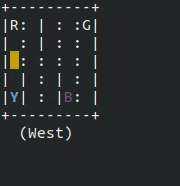

In [ ]:
# baseline 설치
!pip install stable-baselines3[extra]

In [ ]:
# 환경 불러오기
import gym
import torch
env = gym.make('Taxi-v3')

In [ ]:
# 환경의 action space 및 observation space 출력

In [ ]:
# 학습 구현
from stable_baselines3 import (알고리즘)

In [ ]:
# 학습한 모델로 5번의 episode 진행 (render 포함)
# 5번의 episode 모두 최단거리로 승객을 운송할경우 성공